# Dealing with High Dimensional Data

We are going to try different feature selectors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: High Dimensional Data

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 10000,
    n_features =200, 
    random_state=1)

print ("X.shape :", X.shape)
print ("y.shape :", y.shape)

X.shape : (10000, 200)
y.shape : (10000,)


In [3]:
# Let's select the following components
## TODO: change this and see the accuracy 
number_of_fetures_to_select = 20

In [4]:
# print some sample data, row 0
# print (X[0])

## Step-2 : Train / Test Split

In [5]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train1,X_test1,y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=123)


print ("x_train1 :" , X_train1.shape )
print ("x_test1 :", X_test1.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1 : (8000, 200)
x_test1 : (2000, 200)
y_train : (8000,)
y_test : (2000,)


## Step-3: Do a quick logistic regression on **all** data

In [6]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model1 = algo.fit(X_train1, np.ravel(y_train))

CPU times: user 95.6 ms, sys: 4.62 ms, total: 100 ms
Wall time: 34.5 ms


## Step-4: Evaluate

In [7]:
y_pred1 = model1.predict (X_test1)

print ("Train1 accuracy: ", model1.score(X_train1,y_train))
print ("Test1 accuracy: ", model1.score(X_test1, y_test))

Train1 accuracy:  0.877875
Test1 accuracy:  0.867


In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array1 = confusion_matrix(y_test, y_pred1)
#print (cm_array)

cm_df1 = pd.DataFrame(cm_array1, index=cm_labels, columns=cm_labels)
cm_df1

,0,1
0,888,115
1,151,846


[]

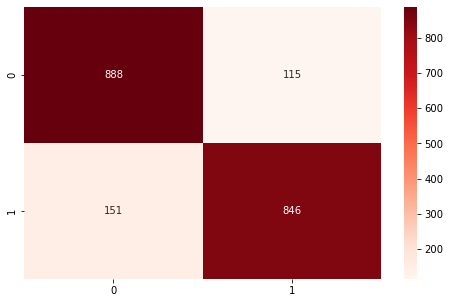

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

## Step-5 : Reduce Dimension

We will try a few algorithms here.


### 5.1 - RFE

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [10]:
from sklearn.feature_selection import RFE

# Defining the Classification function
estimator = LogisticRegression()

# Reducing dimensionality to 250 features for backward elimination model
feature_selector = RFE(estimator=estimator, n_features_to_select=number_of_fetures_to_select, verbose=0)

### 5.2 - SelectKBest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [11]:
# from sklearn.feature_selection import SelectKBest

# feature_selector = SelectKBest(k=number_of_fetures_to_select)

### 5.3 - PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [12]:
# from sklearn.decomposition import PCA

# feature_selector = PCA (n_components=number_of_fetures_to_select)

### 5.4 - FastICA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html?

In [13]:
# from sklearn.decomposition import FastICA

# feature_selector = FastICA(n_components=number_of_fetures_to_select, max_iter=1000, random_state=123) 

### 5.5 - Factor Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [14]:
# # Defining the number of factors
# from sklearn.decomposition import FactorAnalysis

# feature_selector = FactorAnalysis(n_components = number_of_fetures_to_select,random_state=123)

### Run Feature Selector

In [15]:
%%time

feature_selector = feature_selector.fit(X, y)

CPU times: user 16.8 s, sys: 142 ms, total: 17 s
Wall time: 2.13 s


## Step-6: Which features were selected?

In [16]:
# print indexes of features selected

# feature_selector.get_support(indices = True)

## Step-7: Shape train/test with Feature Selector

In [17]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train2 = feature_selector.transform(X_train1)

X_test2 = feature_selector.transform(X_test1)

print ("x_train1:" , X_train1.shape )
print ("x_train2 :" , X_train2.shape )
print ("x_test1:", X_test1.shape)
print ("x_test2 :", X_test2.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1: (8000, 200)
x_train2 : (8000, 20)
x_test1: (2000, 200)
x_test2 : (2000, 20)
y_train : (8000,)
y_test : (2000,)


## Step-8: Let's do LR again

In [18]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model2 = algo.fit(X_train2, np.ravel(y_train))

CPU times: user 44.5 ms, sys: 0 ns, total: 44.5 ms
Wall time: 5.55 ms


In [19]:
y_pred2 = model2.predict (X_test2)

print ("Train accuracy 1: ", model1.score(X_train1,y_train))
print ("Train accuracy 2: ", model2.score(X_train2,y_train))
print ("Test accuracy 1: ", model1.score(X_test1, y_test))
print ("Test accuracy 2: ", model2.score(X_test2, y_test))

Train accuracy 1:  0.877875
Train accuracy 2:  0.879
Test accuracy 1:  0.867
Test accuracy 2:  0.871


In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array2 = confusion_matrix(y_test, y_pred2)
#print (cm_array)

cm_df2 = pd.DataFrame(cm_array2, index=cm_labels, columns=cm_labels)

In [21]:
print ("Confusion matrix 1 ")
cm_df1

Confusion matrix 1 


,0,1
0,888,115
1,151,846


In [22]:
print ("Confusion matrix 2 ")
cm_df2

Confusion matrix 2 


,0,1
0,896,107
1,151,846


[]

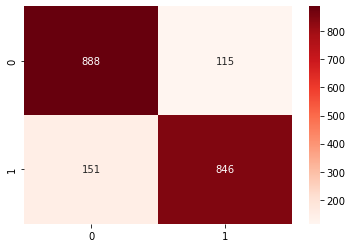

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

[]

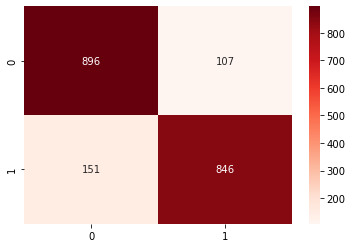

In [24]:
sns.heatmap(cm_df2, annot=True, cmap="Reds", fmt='d').plot()